# A/B Testing

## Overview

- A/B testing compares the performance of two versions of content to see which one appeals more to visitors/viewers.
- It takes a control (A) version against a variant (B) version to measure which one is most successful based on your key metrics.
- A/B testing plays an important role in campaign management since it helps determine what is and isn't working. It allows you to compare and contrast the performance of two different approaches to identify the better one.

**AB Testing Steps:**
- Understanding business problem & data
- Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)
- Look summary stats and plots
- Apply hypothesis testing and check assumptions
    - Check Normality & Homogeneity
    - Apply tests (Shapiro, Levene Test, T-Test, Welch Test, Mann Whitney U Test)
- Evaluate the results
- Make inferences
- Recommend business decision to your customer/director/ceo etc.

In this dataset, we will perform test on three perspectives:

(1) **All users:** The whole dataset

(2) **Paid users:** Filter the dataset with only paid user

(3) **Multiple visit users:** Filter the dataset with users that have multiple visits

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\ychong4\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("AB_Test_Results.csv")
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9995,1981,control,0.0
9996,502,variant,0.0
9997,9214,variant,0.0
9998,7741,control,0.0


## Section 1. Analyze the entire dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [4]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

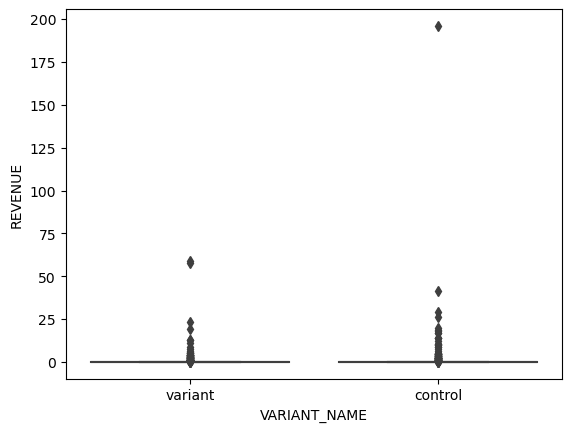

In [5]:
# Plot the revenue based on variant name

sns.boxplot(y='REVENUE', x='VARIANT_NAME', data=df)

In [6]:
df.groupby(by="VARIANT_NAME").agg({"USER_ID": "nunique", "REVENUE": ["sum", "mean", "median", "count"]})

USER_ID REVENUE                       
             nunique     sum      mean median count
VARIANT_NAME                                       
control         3931  643.00  0.129013    0.0  4984
variant         3934  351.47  0.070070    0.0  5016

In [7]:
# Remove the outlier
outlier_idx = df[df.VARIANT_NAME =='control']['REVENUE'].idxmax()

df = df.drop(outlier_idx).reset_index(drop=True)
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
...,...,...,...
9994,1981,control,0.0
9995,502,variant,0.0
9996,9214,variant,0.0
9997,7741,control,0.0


### After removing the outlier

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

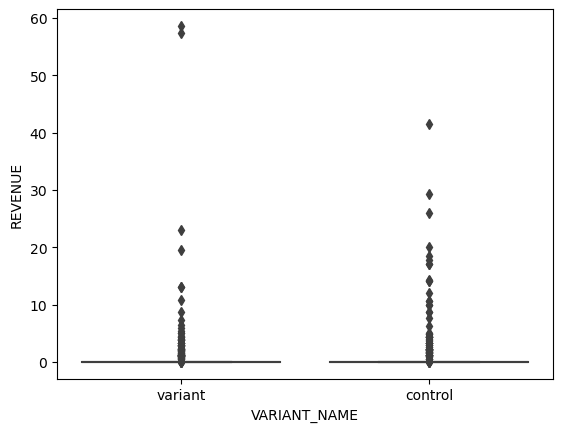

In [8]:
# Plot the revenue based on variant name

sns.boxplot(y='REVENUE', x='VARIANT_NAME', data=df)

### A/B Test on the entire dataset

- 𝐻0: There is no difference in the mean revenue between variant and control.
- 𝐻𝐴: There is a difference in the mean revenue between variant and control.

In [9]:
# Split AB
group_A = df[df.VARIANT_NAME == 'variant']['REVENUE']
group_B = df[df.VARIANT_NAME == 'control']['REVENUE']

# Assumption: Normality
ntA = stats.shapiro(group_A)[1] < 0.05
ntB = stats.shapiro(group_B)[1] < 0.05
# H0: Distribution is Normal! - False
# H1: Distribution is not Normal! - True
print(ntA)
print(ntB)

True
True


C:\Users\ychong4\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


So, both of the groups are not normally distributed. Therefore, we will perform a non-parametric test using Mann-Whitney U test method

In [10]:
t_test, p_value = stats.mannwhitneyu(group_A, group_B)
p_value

0.5291970335120277

p-value > 0.05, fail to reject H0.

In [11]:
data = [
    {'Scenario': 'Test on the entire user group', 'Test Type': 'Non-parametric', 'P_value': p_value, 'Result': 
     "Failed to reject H0", "Remark": 'A/B groups are similar'}
]

result = pd.DataFrame(data)

## 2. Analyze the paid user group

In [12]:
paid = df[df.REVENUE > 0]
paid

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9650,9928,variant,1.25
9710,6468,control,2.93
9723,5205,control,14.17
9724,702,variant,2.92


In [13]:
paid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 13 to 9976
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       151 non-null    int64  
 1   VARIANT_NAME  151 non-null    object 
 2   REVENUE       151 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


In [14]:
paid.describe()

,USER_ID,REVENUE
count,151.000000,151.000000
mean,4872.284768,5.287815
std,2994.920643,8.643782
min,56.000000,0.020000
25%,2173.500000,1.250000
50%,4995.000000,2.340000
75%,7428.500000,4.520000
max,9996.000000,58.630000


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

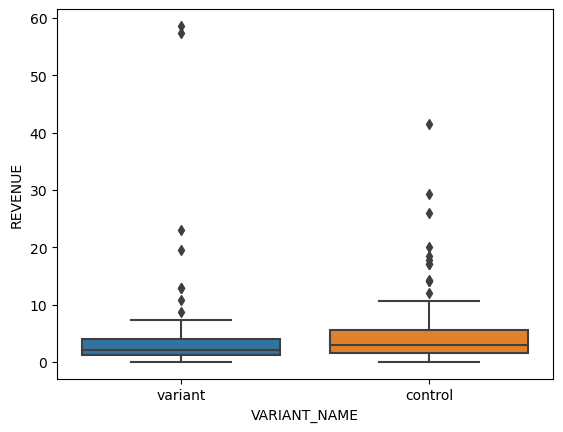

In [15]:
# Plot the revenue based on variant name

sns.boxplot(y='REVENUE', x='VARIANT_NAME', data=paid)

In [16]:
paid.groupby(by="VARIANT_NAME").agg({"USER_ID": "nunique", "REVENUE": ["sum", "mean", "median", "count"]})

USER_ID REVENUE                       
             nunique     sum      mean median count
VARIANT_NAME                                       
control           79  446.99  5.658101   2.93    79
variant           71  351.47  4.881528   2.17    72

### A/B Test on the paid user group

- 𝐻0: There is no difference in the mean revenue between variant and control.
- 𝐻𝐴: There is a difference in the mean revenue between variant and control.

In [17]:
# Split AB
group_A = paid[paid.VARIANT_NAME == 'variant']['REVENUE']
group_B = paid[paid.VARIANT_NAME == 'control']['REVENUE']

# Assumption: Normality
ntA = stats.shapiro(group_A)[1] < 0.05
ntB = stats.shapiro(group_B)[1] < 0.05
# H0: Distribution is Normal! - False
# H1: Distribution is not Normal! - True
print(ntA)
print(ntB)

True
True


So, both of the groups are not normally distributed. Therefore, we will perform a non-parametric test using Mann-Whitney U test method

In [18]:
t_test, p_value = stats.mannwhitneyu(group_A, group_B)
p_value

0.10145877111519161

p-value > 0.05, fail to reject H0.

In [19]:
data = ['Test on the paid user group', 'Non-parametric', p_value, 'Failed to reject H0', 'A/B groups are similar']
new_data = pd.DataFrame([data], columns =['Scenario', 'Test Type', 'P_value', 'Result', 'Remark'])

result = pd.concat([result, new_data], ignore_index=True)

## 3. Analyze the users with multiple visits

In [20]:
# It seems like there are some users that have multple records in this dataset

df[df['USER_ID'].duplicated()]

,USER_ID,VARIANT_NAME,REVENUE
106,7704,control,0.0
195,8406,variant,0.0
224,7042,variant,0.0
283,4064,variant,0.0
302,4409,control,0.0
...,...,...,...
9991,9303,variant,0.0
9992,2400,variant,0.0
9993,3129,control,0.0
9994,1981,control,0.0


In [21]:
grouped_df = df.groupby(by=['USER_ID', 'VARIANT_NAME']).agg({'REVENUE':'sum'}).reset_index()
variant_counts = grouped_df.groupby('USER_ID').size()
users_with_multiple_variants = variant_counts[variant_counts > 1].index
filtered_df = grouped_df[grouped_df['USER_ID'].isin(users_with_multiple_variants)]
filtered_df

,USER_ID,VARIANT_NAME,REVENUE
1,3,control,0.00
2,3,variant,0.00
7,10,control,0.00
8,10,variant,0.00
13,18,control,0.00
...,...,...,...
7851,9982,variant,0.00
7859,9996,control,0.00
7860,9996,variant,6.46
7862,10000,control,0.00


In [22]:
filtered_df.groupby(by="VARIANT_NAME").agg({"USER_ID": "nunique", "REVENUE": ["sum", "mean", "median", "count"]})

USER_ID REVENUE                       
             nunique     sum      mean median count
VARIANT_NAME                                       
control         1541  172.44  0.111901    0.0  1541
variant         1541  172.15  0.111713    0.0  1541

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

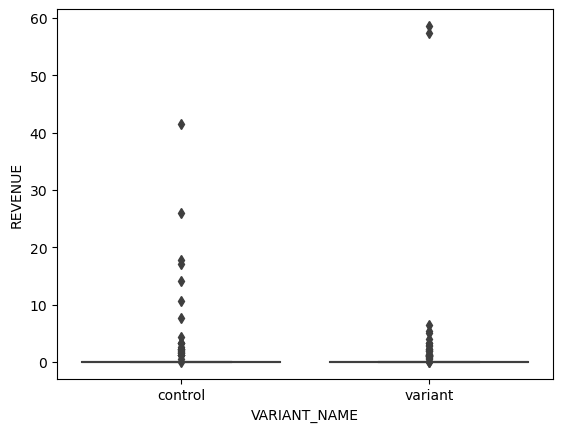

In [23]:
# Plot the revenue based on variant name

sns.boxplot(y='REVENUE', x='VARIANT_NAME', data=filtered_df)

### A/B Test on the user group with multiple visits

- 𝐻0: There is no difference in the mean revenue between variant and control.
- 𝐻𝐴: There is a difference in the mean revenue between variant and control.

In [24]:
# Split AB
group_A = filtered_df[filtered_df.VARIANT_NAME == 'variant']['REVENUE']
group_B = filtered_df[filtered_df.VARIANT_NAME == 'control']['REVENUE']

# Assumption: Normality
ntA = stats.shapiro(group_A)[1] < 0.05
ntB = stats.shapiro(group_B)[1] < 0.05
# H0: Distribution is Normal! - False
# H1: Distribution is not Normal! - True
print(ntA)
print(ntB)

True
True


So, both of the groups are not normally distributed. Therefore, we will perform a non-parametric test using Mann-Whitney U test method

In [25]:
t_test, p_value = stats.mannwhitneyu(group_A, group_B)
p_value

0.6957578454406484

p-value > 0.05, fail to reject H0.

In [26]:
data = ['Test on the user group with multiple visits', 'Non-parametric', p_value, 'Failed to reject H0','A/B groups are similar']
new_data = pd.DataFrame([data], columns =['Scenario', 'Test Type', 'P_value', 'Result', 'Remark'])

result = pd.concat([result, new_data], ignore_index=True)

In [27]:
result

,Scenario,Test Type,P_value,Result,Remark
0,Test on the entire user group,Non-parametric,0.529197,Failed to reject H0,A/B groups are similar
1,Test on the paid user group,Non-parametric,0.101459,Failed to reject H0,A/B groups are similar
2,Test on the user group with multiple visits,Non-parametric,0.695758,Failed to reject H0,A/B groups are similar


# Conclusion

In all three scenarios, our hypothesis tests show results of failed to reject H0. Therefore, we can conclude that in all scenarios, A/B groups are similar, and the controls are not effective.